この分析では、全体の企業とフルリモート企業における最低年収の平均値及び分布を比較する。

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

### DBからデータを抽出
フルリモート企業の抽出として求人タイトル、ポイント、タグに "フルリモート" というワードが含まれているかで判定した。

In [8]:
# データベース接続
conn = sqlite3.connect("job.db")

# SQLクエリでデータを取得
query_all = "SELECT salary_min FROM job_postings"
query_remote = """
SELECT salary_min
FROM job_postings
WHERE tags LIKE '%フルリモート%' OR job_title LIKE '%フルリモート%' OR point LIKE '%フルリモート%'
"""

# データを読み込む
df_all = pd.read_sql_query(query_all, conn)
df_remote = pd.read_sql_query(query_remote, conn)

# データベース接続を閉じる
conn.close()


### 平均値の計算
全体の企業とフルリモート企業における最低年収の平均値を計算し、比較する。

In [11]:
# 平均値を計算
mean_all = df_all["salary_min"].mean()
mean_remote = df_remote["salary_min"].mean()

# 結果の確認
print(f"全体の企業の平均最低年収: {mean_all:.2f}万円")
print(f"フルリモート企業の平均最低年収: {mean_remote:.2f}万円")


全体の企業の平均最低年収: 634.66万円
フルリモート企業の平均最低年収: 675.42万円


フルリモート企業の平均最低年収は全体の企業より約40万円高い結果となった。

### 分布の描画
全体の企業とフルリモート企業における最低年収の分布を描画し、比較する。

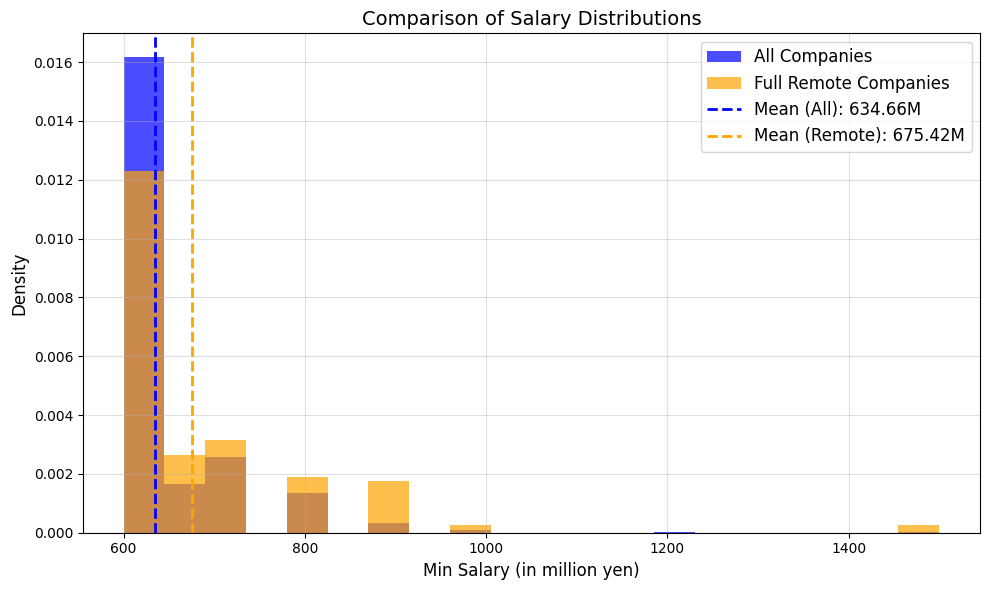

In [10]:
# ヒストグラムを描画
plt.figure(figsize=(10, 6))
plt.hist(df_all["salary_min"], bins=20, density=True, alpha=0.7, label="All Companies", color="blue")
plt.hist(df_remote["salary_min"], bins=20, density=True, alpha=0.7, label="Full Remote Companies", color="orange")

# 平均値をグラフに追加
plt.axvline(mean_all, color="blue", linestyle="dashed", linewidth=2, label=f"Mean (All): {mean_all:.2f}M")
plt.axvline(mean_remote, color="orange", linestyle="dashed", linewidth=2, label=f"Mean (Remote): {mean_remote:.2f}M")

# グラフの装飾
plt.title("Comparison of Salary Distributions", fontsize=14)
plt.xlabel("Min Salary (in million yen)", fontsize=12)
plt.ylabel("Density", fontsize=12)  # 正規化しているため「Density」に変更
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()

# グラフを表示
plt.show()


このグラフの詳細は以下の通りです。
- 青のヒストグラム: 全体の企業の最低年収の分布
- オレンジのヒストグラム: フルリモート企業の最低年収の分布
- 青の点線: 全体の企業の平均最低年収
- オレンジの点線: フルリモート企業の平均最低年収

フルリモート企業は全体の企業と比較してやや右に分布している。